In [2]:
import pandas as pd
import matplotlib.image as im
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import seaborn as sns

In [3]:
import keras 
from keras import layers, Sequential
from keras.layers import Dense, Dropout
from keras.utils  import plot_model

In [6]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [4]:
!ls -ltr

total 1673002
-rw-r--r-- 1 Lokesh 197121     31939 Oct 10 08:29 sample_submission (2).csv
-rw-r--r-- 1 Lokesh 197121    451405 Oct 10 08:29 test (2).csv
-rw-r--r-- 1 Lokesh 197121    460676 Oct 10 08:29 train (3).csv
-rw-r--r-- 1 Lokesh 197121      6004 Oct 10 09:08 Houeses and rents.ipynb
-rw-r--r-- 1 Lokesh 197121     40401 Oct 10 09:41 houses & rents main.ipynb
-rw-r--r-- 1 Lokesh 197121    664427 Oct 10 12:02 Task-01.ipynb
-rw-r--r-- 1 Lokesh 197121    684858 Oct 12 12:24 Churn_Modelling.csv
-rw-r--r-- 1 Lokesh 197121        72 Oct 13 10:31 Untitled.ipynb
-rw-r--r-- 1 Lokesh 197121    791252 Oct 13 11:25 ANN_D.ipynb
-rw-r--r-- 1 Lokesh 197121      3981 Oct 13 19:33 Mall_Customers.csv
-rw-r--r-- 1 Lokesh 197121    271249 Oct 13 19:57 Task 2.ipynb
-rw-r--r-- 1 Lokesh 197121        72 Oct 14 09:21 Untitled2.ipynb
-rw-r--r-- 1 Lokesh 197121 851576689 Oct 14 09:28 dogs-vs-cats.zip
drwxr-xr-x 1 Lokesh 197121         0 Oct 14 09:41 train
-rw-r--r-- 1 Lokesh 197121      1444 Oct 14 10:05 U

In [8]:
import zipfile

zip_files = ['test1','train']

for zip_file in zip_files:
    with zipfile.ZipFile('C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/dogs-vs-cats.zip'.format(zip_file),'r') as z:
        z.extractall(".")
        print("{} unzipped".format(zip_file))

test1 unzipped
train unzipped


In [9]:
Train_DIR_path = 'C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/train/train'
file_names = os.listdir(Train_DIR_path)
print('There are {} number of images in the directory'.format(len(file_names)))

There are 25000 number of images in the directory


In [10]:
!ls -ltr

total 1672830
-rw-r--r-- 1 Lokesh 197121     31939 Oct 10 08:29 sample_submission (2).csv
-rw-r--r-- 1 Lokesh 197121    451405 Oct 10 08:29 test (2).csv
-rw-r--r-- 1 Lokesh 197121    460676 Oct 10 08:29 train (3).csv
-rw-r--r-- 1 Lokesh 197121      6004 Oct 10 09:08 Houeses and rents.ipynb
-rw-r--r-- 1 Lokesh 197121     40401 Oct 10 09:41 houses & rents main.ipynb
-rw-r--r-- 1 Lokesh 197121    664427 Oct 10 12:02 Task-01.ipynb
-rw-r--r-- 1 Lokesh 197121    684858 Oct 12 12:24 Churn_Modelling.csv
-rw-r--r-- 1 Lokesh 197121        72 Oct 13 10:31 Untitled.ipynb
-rw-r--r-- 1 Lokesh 197121    791252 Oct 13 11:25 ANN_D.ipynb
-rw-r--r-- 1 Lokesh 197121      3981 Oct 13 19:33 Mall_Customers.csv
-rw-r--r-- 1 Lokesh 197121    271249 Oct 13 19:57 Task 2.ipynb
-rw-r--r-- 1 Lokesh 197121        72 Oct 14 09:21 Untitled2.ipynb
-rw-r--r-- 1 Lokesh 197121 851576689 Oct 14 09:28 dogs-vs-cats.zip
drwxr-xr-x 1 Lokesh 197121         0 Oct 14 09:41 train
-rw-r--r-- 1 Lokesh 197121      2142 Oct 14 10:28 U

In [14]:
def to_dataframe(file_names):
    files,labels = list(),list()
    for file  in file_names:
        files.append(file)
        labels.append(file[:3])
    df = pd.DataFrame({'filenames':files,'Labels':labels})
    return  df

In [16]:
df = to_dataframe(file_names)

In [18]:
df.head(5)

filenames Labels
0     cat.0.jpg    cat
1     cat.1.jpg    cat
2    cat.10.jpg    cat
3   cat.100.jpg    cat
4  cat.1000.jpg    cat

Data set label distribution 
: Labels
cat    12500
dog    12500
Name: count, dtype: int64


<Axes: xlabel='Labels', ylabel='count'>

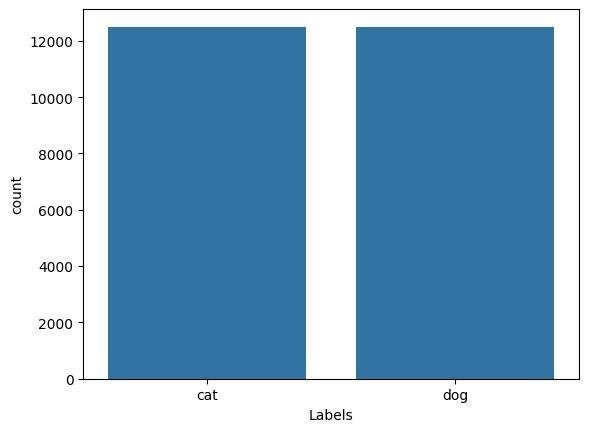

In [20]:
print('Data set label distribution \n:', df['Labels'].value_counts())

sns.countplot(x= df['Labels'])

In [22]:
cat = [file for file in file_names if file[:3]=='cat']
dogs = [file for file in file_names if file[:3]=='dog']

(254, 432, 3)


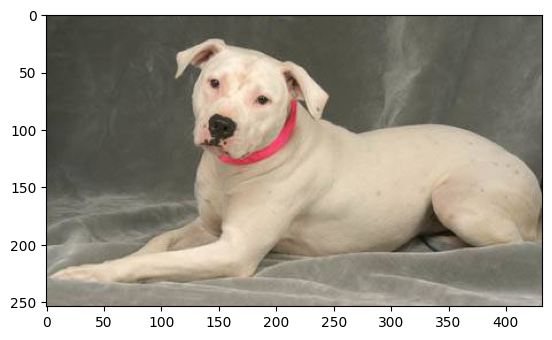

In [24]:
image = im.imread('C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/train/train/dog.1710.jpg')
print(image.shape)
plt.imshow(image)

(321, 305, 3)


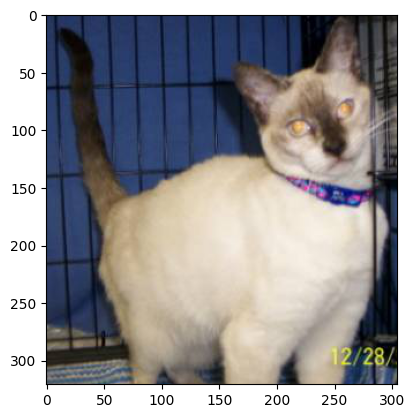

In [26]:
image = im.imread('C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/train/train/cat.1079.jpg')
print(image.shape)
plt.imshow(image)

(374, 500, 3)
(169, 180, 3)
(229, 340, 3)
(374, 499, 3)


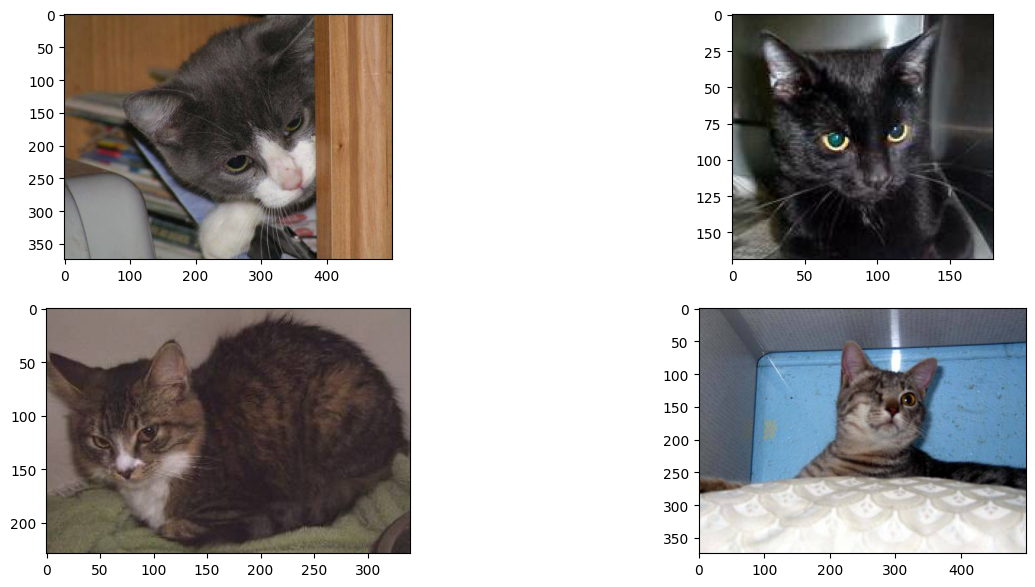

In [28]:
fig,ax = plt.subplots(2,2,figsize=(15,7))

for i,c in enumerate(np.random.randint(0,len(cat),4),start=1):
    plt.subplot(2,2,i)                  
    image = im.imread('C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/train/train/'+cat[c])
    print(image.shape)
    plt.imshow(image)

(277, 448, 3)
(496, 499, 3)
(160, 239, 3)
(259, 308, 3)


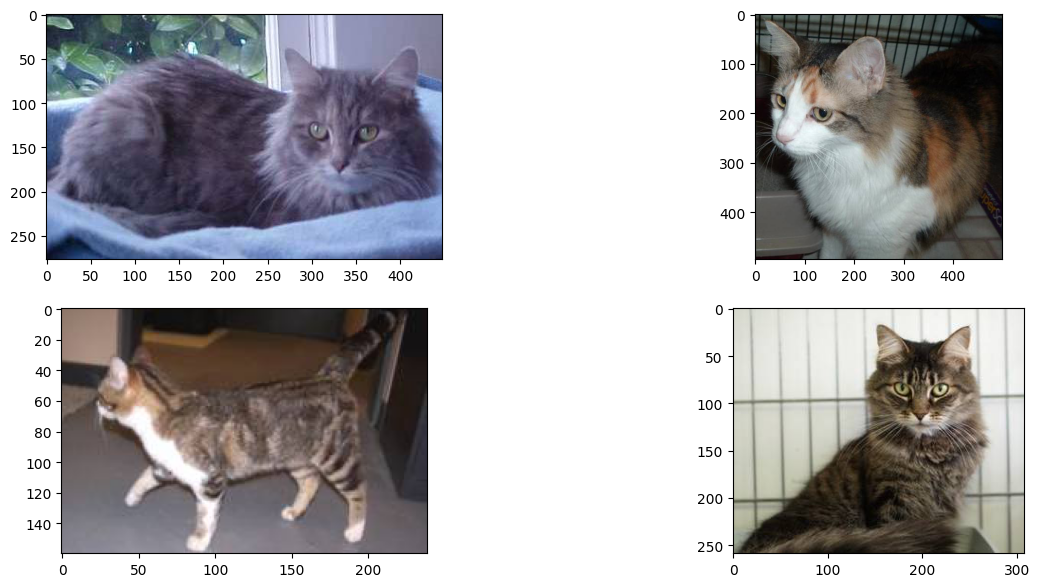

In [29]:
import random

random_cat = random.sample(cat,4)

fig,ax = plt.subplots(2,2,figsize=(15,7))
for i,img in enumerate(random_cat):
    image = im.imread('C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/train/train/'+img)
    ax[i//2,i%2].imshow(image)
    print(image.shape)

(346, 499, 3)
(199, 200, 3)
(254, 500, 3)
(375, 499, 3)


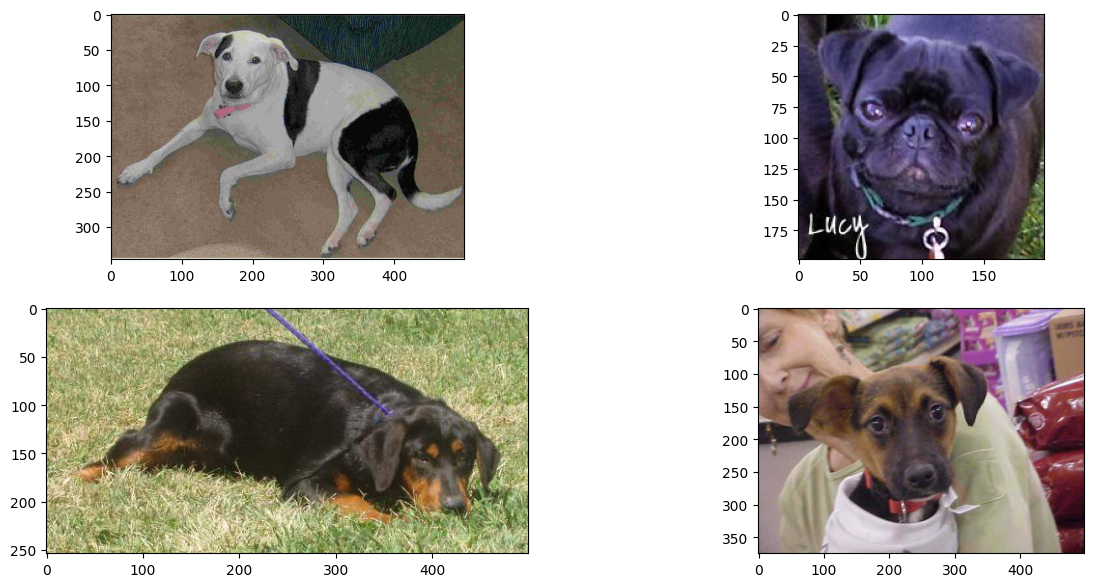

In [31]:
dog_images = random.sample(dogs,4)

fig,ax = plt.subplots(2,2,figsize=(15,7))

for i,img in enumerate(dog_images):
    image = im.imread('C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/train/train/'+img)
    ax[i//2,i%2].imshow(image)
    print(image.shape)

In [33]:
from sklearn.model_selection import train_test_split

train_set,validation_set =train_test_split(df,test_size=0.2,random_state=seed) 

In [35]:
train_set.shape, validation_set.shape

((20000, 2), (5000, 2))

Test Set Distribution: Labels
cat    10004
dog     9996
Name: count, dtype: int64
Validation set Distribution: Labels
dog    2504
cat    2496
Name: count, dtype: int64


Text(0.5, 1.0, 'validation set')

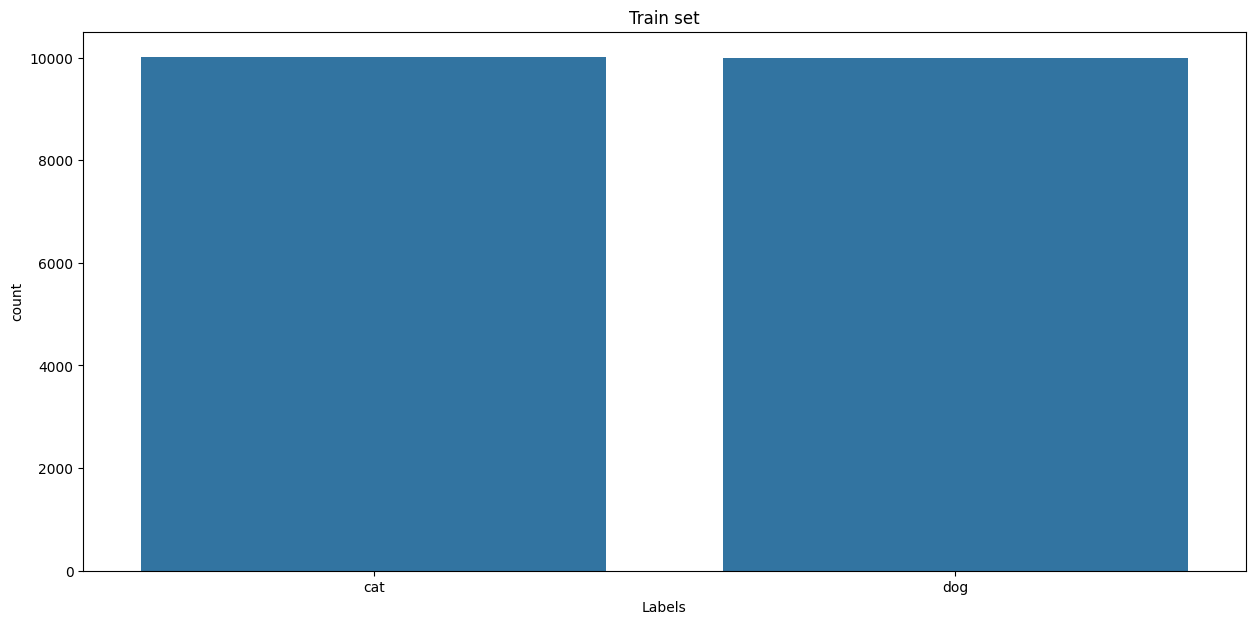

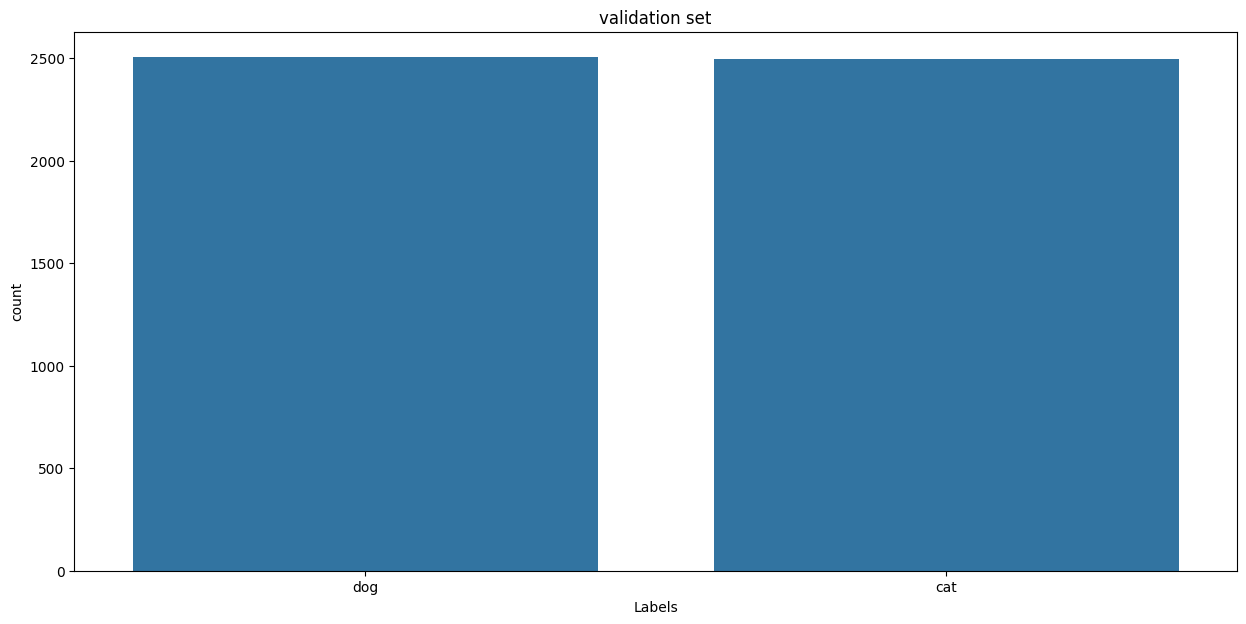

In [38]:
plt.figure(figsize=(15,7))
sns.countplot(x =train_set['Labels'])
print('Test Set Distribution:',train_set['Labels'].value_counts())
plt.title('Train set')

plt.figure(figsize=(15,7))
sns.countplot(x =validation_set['Labels'])
print('Validation set Distribution:',validation_set['Labels'].value_counts())
plt.title('validation set')

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [42]:
width, height = 150,150
batch_size = 32

In [44]:
df

filenames Labels
0         cat.0.jpg    cat
1         cat.1.jpg    cat
2        cat.10.jpg    cat
3       cat.100.jpg    cat
4      cat.1000.jpg    cat
...             ...    ...
24995  dog.9995.jpg    dog
24996  dog.9996.jpg    dog
24997  dog.9997.jpg    dog
24998  dog.9998.jpg    dog
24999  dog.9999.jpg    dog

[25000 rows x 2 columns]

In [46]:
train_datagen=ImageDataGenerator(rescale=1./255, #rescaling the pixels
                                 rotation_range=15, #rotate the image for better prediction
                                 zoom_range=0.2,
                                 shear_range = 0.1,
                                 horizontal_flip = True,
                                 width_shift_range=0.1,
                                 height_shift_range=0.1
                                )
training_data = train_datagen.flow_from_dataframe(dataframe=df,
                                                 directory='C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/train/train',
                                                 x_col = 'filenames',#feature
                                                 y_col='Labels',#target
                                                 target_size=(width,height),#same height,width for all data
                                                 class_mode='categorical',# reads data like one_hot_encoding, binary works like label encoder
                                                 batch_size=batch_size) #increase read speed

Found 25000 validated image filenames belonging to 2 classes.


In [47]:
training_data.class_indices

{'cat': 0, 'dog': 1}

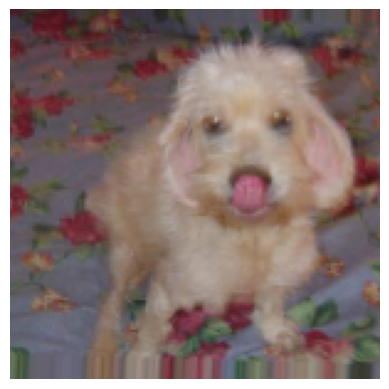

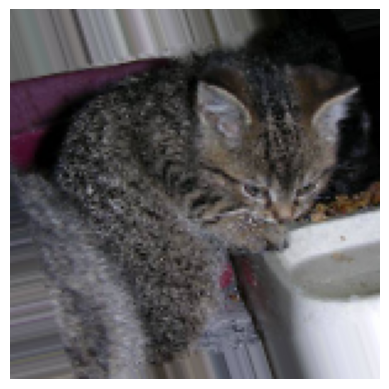

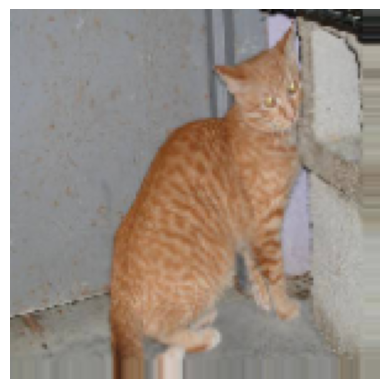

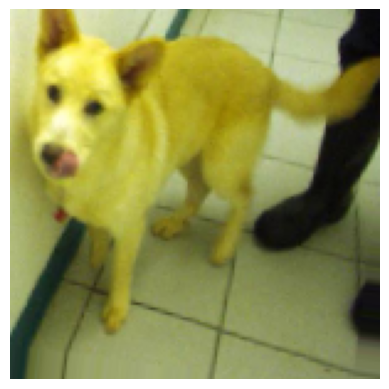

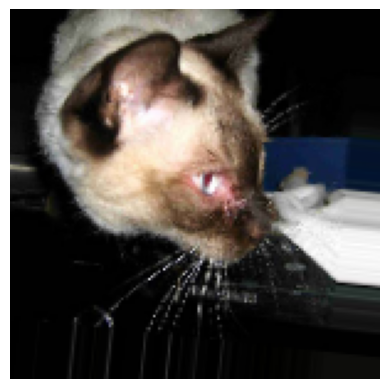

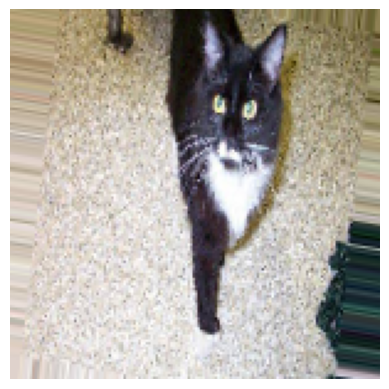

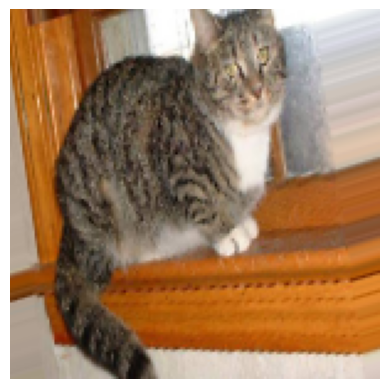

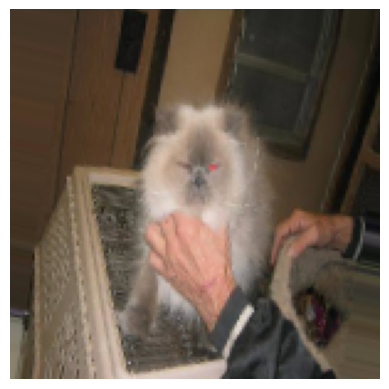

In [50]:
num_images_to_display = 8

for i in range(num_images_to_display):
    image_batch, label_batch = next(training_data) 
    image = image_batch[0] 
    plt.imshow(image)  
    plt.axis('off')  
    plt.show()  

In [51]:
validation_datagen=ImageDataGenerator(rescale=1./255) #rescaling the pixel
validation_data = validation_datagen.flow_from_dataframe(dataframe=validation_set,
                                                 directory='C:/Users/Lokesh/Desktop/ML - 1ST PROJECT/train/train',
                                                 x_col = 'filenames',#feature
                                                 y_col='Labels',#target
                                                 target_size=(width,height),#same height,width for all data
                                                 class_mode='categorical',# reads data like one_hot_encoding, binary works like label encoder
                                                 batch_size=batch_size) #increase read speed

Found 5000 validated image filenames belonging to 2 classes.


In [52]:
from keras import Sequential
from keras.layers import Dense, Dropout


model = keras.Sequential([
    layers.Conv2D(128,kernel_size=4,activation='relu',input_shape=(width,height,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,kernel_size=4,activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(32,kernel_size=4,activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(16,kernel_size=4,activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(8,kernel_size=4,activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    
    layers.Dense(32,activation='relu'),
    Dropout(0.2),
    layers.Dense(16,activation='relu'),
    Dropout(0.2),
    layers.Dense(8,activation='relu'),
    Dropout(0.2),
    layers.Dense(2,activation='softmax')
])

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 147, 147, 128)       │           6,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 73, 73, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 70, 70, 64)          │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 35, 35, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 32)          │          32,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 16)          │           8,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 8)             │           2,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 1, 1, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │              18 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181,442 (708.76 KB)

 Trainable params: 181,442 (708.76 KB)

 Non-trainable params: 0 (0.00 B)

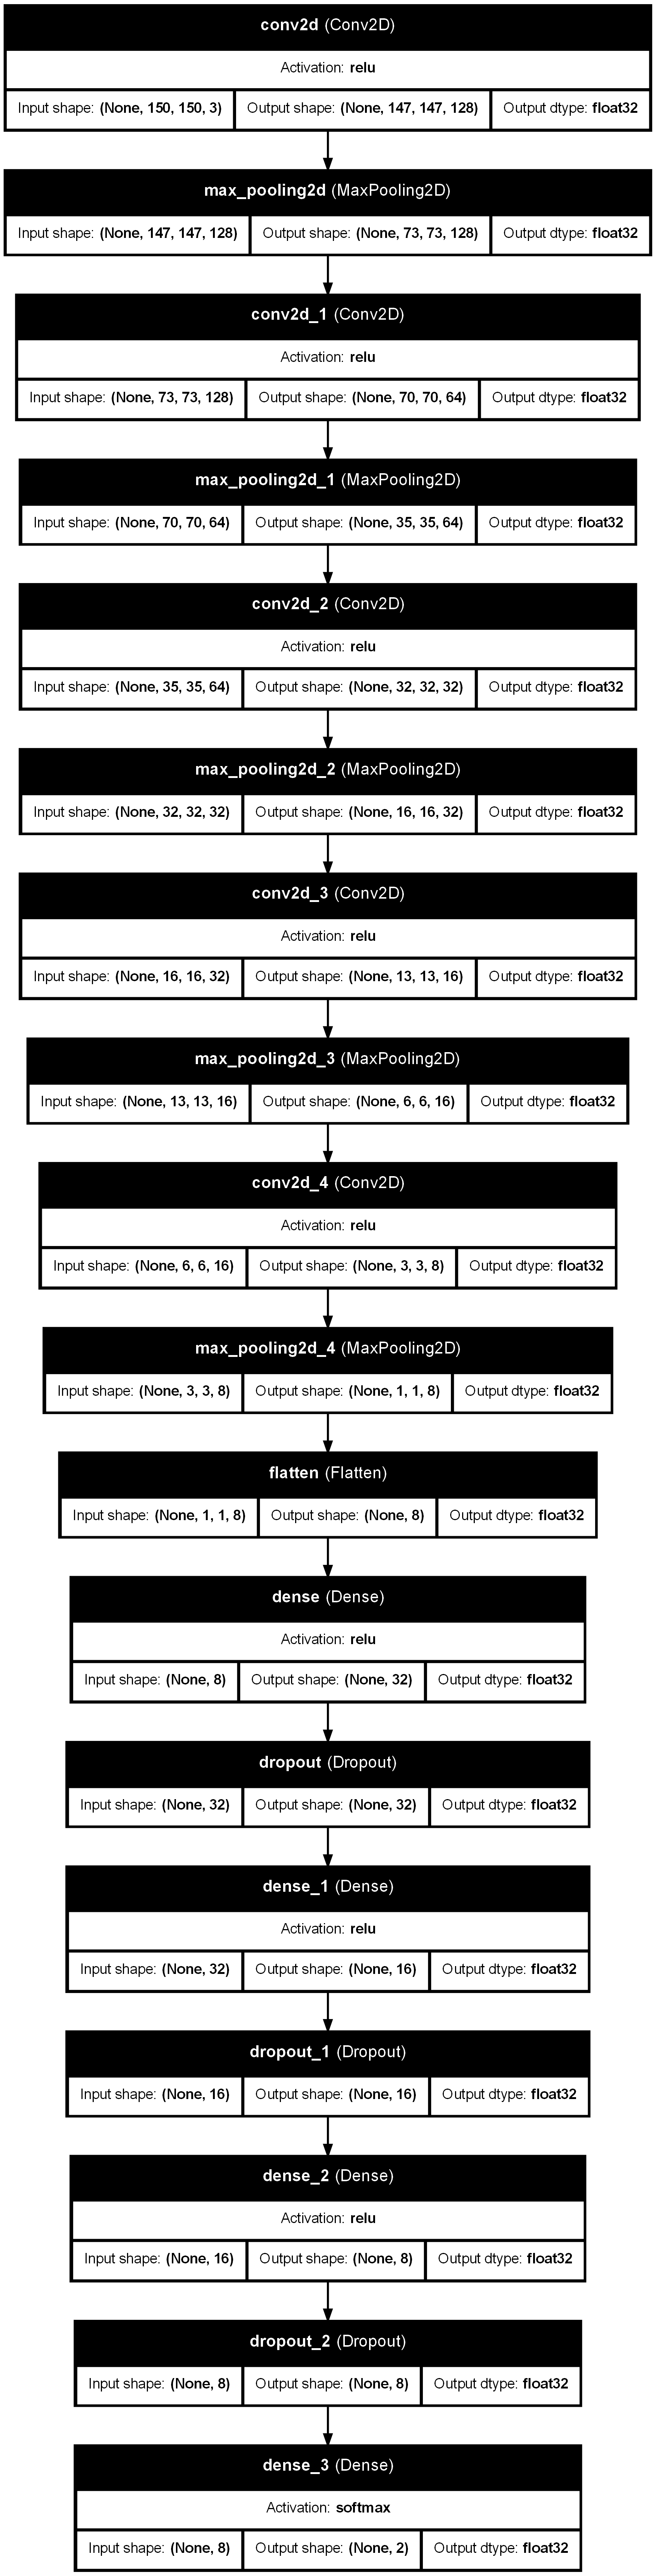

In [59]:
keras.utils.plot_model(model,show_layer_activations=True,show_layer_names=True,show_shapes=True,show_dtype=True,to_file='model.png')

In [61]:
from keras import optimizers
opt = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
from keras.callbacks import ReduceLROnPlateau,EarlyStopping,ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=4,min_lr=0.0001,factor=0.5)
checkpoint = ModelCheckpoint('model.keras',save_best_only=True)

In [65]:
history = model.fit(training_data,
                    validation_data=validation_data,
                    verbose=1,
                    callbacks=[early_stopping,reduce_lr,checkpoint],
                    epochs=20,steps_per_epoch = 10,
                    #steps_per_epoch=10,
                   validation_steps = validation_set.shape[0]//batch_size)
                   #steps_per_epoch = train_set.shape[0]//batch_size)

C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.4515 - loss: 0.7680 - val_accuracy: 0.5006 - val_loss: 0.6951 - learning_rate: 0.0100
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 846ms/step - accuracy: 0.5288 - loss: 0.6930 - val_accuracy: 0.6250 - val_loss: 0.6786 - learning_rate: 0.0100
Epoch 3/20


C:\ProgramData\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.5237 - loss: 0.6915 - val_accuracy: 0.5008 - val_loss: 0.6936 - learning_rate: 0.0100
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 806ms/step - accuracy: 0.5500 - loss: 0.6902 - val_accuracy: 0.5000 - val_loss: 0.6932 - learning_rate: 0.0100
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 46s 5s/step - accuracy: 0.4901 - loss: 0.6941 - val_accuracy: 0.4992 - val_loss: 0.6932 - learning_rate: 0.0100
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 801ms/step - accuracy: 0.5262 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6934 - learning_rate: 0.0100


In [67]:
score = model.evaluate(validation_data)
print('Test Accuracy:',score[1])
print('Test loss:',score[0])

157/157 ━━━━━━━━━━━━━━━━━━━━ 34s 218ms/step - accuracy: 0.4926 - loss: 0.6964
Test Accuracy: 0.5008000135421753
Test loss: 0.6952781677246094


In [69]:
from tensorflow.keras.models import load_model

model1 = load_model('model.keras')

In [71]:
import os
print(os.getcwd())

C:\Users\Lokesh\Desktop\ML - 1ST PROJECT


In [73]:
base_model = keras.applications.vgg16.VGG16(weights='imagenet',include_top=False,input_shape=(width,height,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 24s 0us/step


In [75]:
base_model.trainable=False

In [77]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [79]:
train_set.shape

(20000, 2)

In [81]:
from tensorflow.keras.layers import *

model = keras.models.Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2,activation='softmax'))

In [83]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,763,650 (60.13 MB)

 Trainable params: 1,048,962 (4.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [85]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [87]:
early_stopping = EarlyStopping(monitor='val_loss',patience=4,restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=4,min_lr=0.0001,factor=0.5)
checkpoint = ModelCheckpoint('TLmodel.keras',save_best_only=True)

In [89]:
history = model.fit(training_data,epochs=30,validation_data=validation_data,steps_per_epoch=10,callbacks=[early_stopping,reduce_lr,checkpoint])

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 274s 30s/step - accuracy: 0.4543 - loss: 1.7445 - val_accuracy: 0.5130 - val_loss: 0.7721 - learning_rate: 0.0010
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 283s 31s/step - accuracy: 0.5747 - loss: 0.7399 - val_accuracy: 0.8182 - val_loss: 0.4480 - learning_rate: 0.0010
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 281s 31s/step - accuracy: 0.7527 - loss: 0.4953 - val_accuracy: 0.8144 - val_loss: 0.4089 - learning_rate: 0.0010
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 280s 31s/step - accuracy: 0.8345 - loss: 0.4058 - val_accuracy: 0.8564 - val_loss: 0.3459 - learning_rate: 0.0010
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 287s 32s/step - accuracy: 0.8218 - loss: 0.3613 - val_accuracy: 0.8700 - val_loss: 0.3207 - learning_rate: 0.0010
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 280s 31s/step - accuracy: 0.8120 - loss: 0.4182 - val_accuracy: 0.8630 - val_loss: 0.3155 - learning_rate: 0.0010
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 306s 34s/step - accuracy: 0.7886 - loss: 0.4101 - 

In [91]:
evaluation = model.evaluate(validation_data)
print('Test Accuracy',evaluation[1])
print('Test Accuracy',evaluation[0])

157/157 ━━━━━━━━━━━━━━━━━━━━ 261s 2s/step - accuracy: 0.8970 - loss: 0.2530
Test Accuracy 0.8992000222206116
Test Accuracy 0.24528364837169647


Text(0.5, 1.0, 'Model Accuracy')

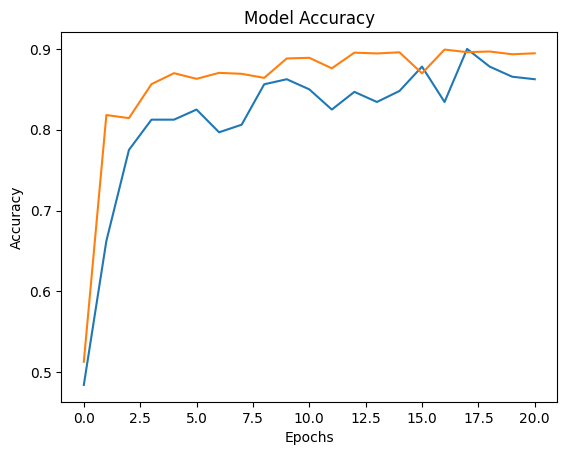

In [93]:
plt.plot(history.history['accuracy'],label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

In [95]:
from tensorflow.keras.models import load_model

model2 = load_model('TLmodel.keras')

In [97]:
for layers in base_model.layers[0:2]:
    layers.trainable= True

In [99]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [101]:
history = model.fit(training_data,epochs=30,validation_data=validation_data,steps_per_epoch=10)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 300s 32s/step - accuracy: 0.8292 - loss: 0.3530 - val_accuracy: 0.8844 - val_loss: 0.2610
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 309s 34s/step - accuracy: 0.8627 - loss: 0.3238 - val_accuracy: 0.9042 - val_loss: 0.2304
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 313s 34s/step - accuracy: 0.8777 - loss: 0.2816 - val_accuracy: 0.8918 - val_loss: 0.2591
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 311s 34s/step - accuracy: 0.8358 - loss: 0.3772 - val_accuracy: 0.9074 - val_loss: 0.2337
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 304s 33s/step - accuracy: 0.8469 - loss: 0.3443 - val_accuracy: 0.9160 - val_loss: 0.1978
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 308s 34s/step - accuracy: 0.8748 - loss: 0.2917 - val_accuracy: 0.9174 - val_loss: 0.1963
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 305s 33s/step - accuracy: 0.8915 - loss: 0.2644 - val_accuracy: 0.9234 - val_loss: 0.1892
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 302s 33s/step - accuracy: 0.8955 - loss: 0.2464 - val_accuracy: 0.

In [103]:
evaluation = model.evaluate(validation_data)
print('Test Accuracy',evaluation[1])
print('Test Accuracy',evaluation[0])

157/157 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.9223 - loss: 0.1832
Test Accuracy 0.9197999835014343
Test Accuracy 0.19171930849552155
